In [9]:
import yfinance as yf
import requests
from bs4 import BeautifulSoup
import pandas as pd
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [10]:
GameStop = yf.Ticker('GME')

In [11]:
gme_data = GameStop.history(period='max')

In [12]:
gme_data.reset_index(inplace=True)
gme_data.head(5)

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-02-13 00:00:00-05:00,1.620128,1.693350,1.603296,1.691666,76216000,0.0,0.0
1,2002-02-14 00:00:00-05:00,1.712708,1.716074,1.670627,1.683251,11021600,0.0,0.0
2,2002-02-15 00:00:00-05:00,1.683250,1.687458,1.658001,1.674834,8389600,0.0,0.0
3,2002-02-19 00:00:00-05:00,1.666418,1.666418,1.578047,1.607504,7410400,0.0,0.0
4,2002-02-20 00:00:00-05:00,1.615920,1.662210,1.603296,1.662210,6892800,0.0,0.0


In [13]:
html_data = requests.get('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html')

In [14]:
if html_data.status_code == 200:
    html_data = html_data.content
    soup = BeautifulSoup(html_data, 'html5lib')

In [15]:
import io

table = soup.find_all('table')[1]

table_str = str(table)
html_io = io.StringIO(table_str)
gme_revenue = pd.read_html(html_io)[0]
gme_revenue.columns = ['Date', 'Revenue']

In [16]:
gme_revenue.tail(5)

,Date,Revenue
57,2006-01-31,"$1,667"
58,2005-10-31,$534
59,2005-07-31,$416
60,2005-04-30,$475
61,2005-01-31,$709


C:\Users\taghi\anaconda3\Lib\site-packages\_plotly_utils\basevalidators.py:106: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result

C:\Users\taghi\anaconda3\Lib\site-packages\_plotly_utils\basevalidators.py:106: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



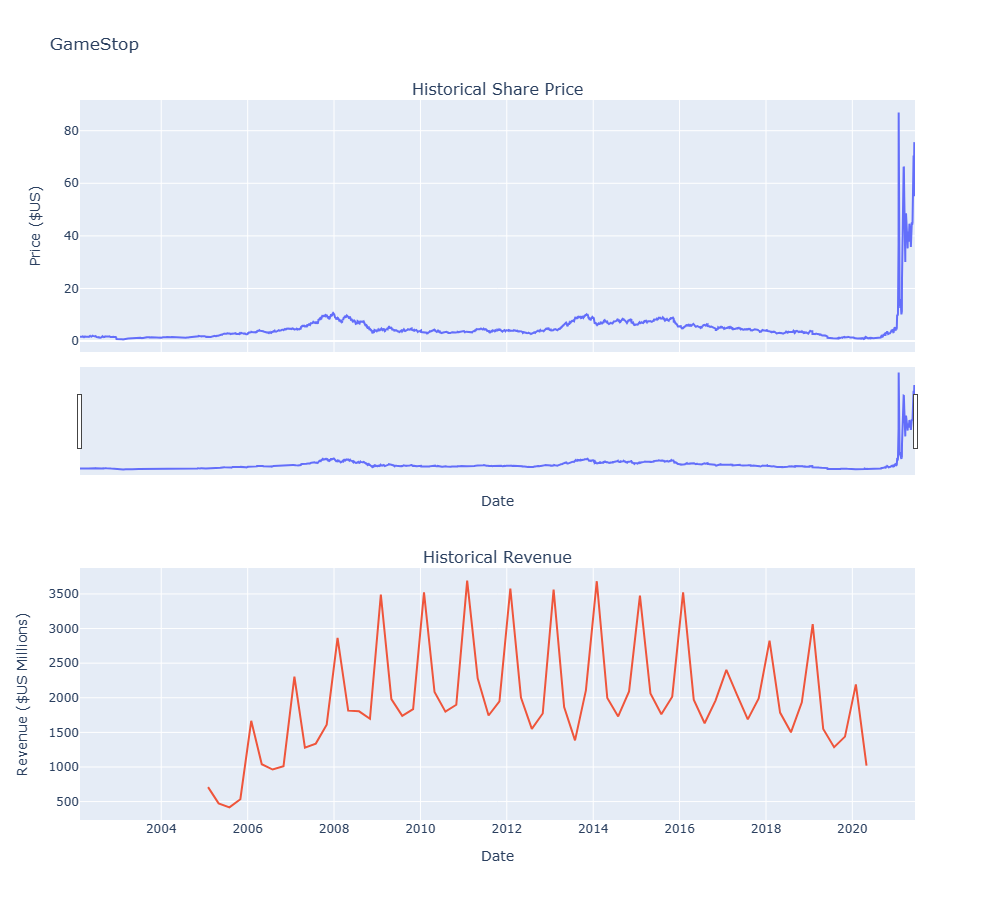

In [20]:
# Create make_graph function to visualize data
def make_graph(stock_data, revenue_data, stock):
    fig = make_subplots(rows=2, cols=1, shared_xaxes=True, subplot_titles=("Historical Share Price", "Historical Revenue"), vertical_spacing=0.3)

    stock_data_specific = stock_data[stock_data['Date'] <= '2021-06-14']
    revenue_data_specific = revenue_data[revenue_data['Date'] <= '2021-04-30']

    fig.add_trace(go.Scatter(x=pd.to_datetime(stock_data_specific['Date']), y=stock_data_specific['Close'].astype("float"), name="Share Price"), row=1, col=1)

    # Convert revenue_data to numeric format by removing commas and dollar signs
    revenue_data_numeric = revenue_data_specific['Revenue'].replace('[\$,]', '', regex=True).astype(float)

    fig.add_trace(go.Scatter(x=pd.to_datetime(revenue_data_specific['Date']), y=revenue_data_numeric, name="Revenue"), row=2, col=1)

    fig.update_xaxes(title_text="Date", row=1, col=1)
    fig.update_xaxes(title_text="Date", row=2, col=1)
    fig.update_yaxes(title_text="Price ($US)", row=1, col=1)
    fig.update_yaxes(title_text="Revenue ($US Millions)", row=2, col=1)

    fig.update_layout(showlegend=False, height=900, title=stock, xaxis_rangeslider_visible=True)
    fig.show()

# Assuming you have tesla_data and tesla_revenue DataFrames
make_graph(gme_data, gme_revenue, 'GameStop')